In [1]:
import pandas as pd

In [2]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 
%matplotlib inline

In [7]:
df = pd.read_csv('lending_club_loan_two.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244161 entries, 0 to 244160
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             244161 non-null  float64
 1   term                  244161 non-null  object 
 2   int_rate              244161 non-null  float64
 3   installment           244161 non-null  float64
 4   grade                 244161 non-null  object 
 5   sub_grade             244161 non-null  object 
 6   emp_title             230024 non-null  object 
 7   emp_length            232856 non-null  object 
 8   home_ownership        244160 non-null  object 
 9   annual_inc            244160 non-null  float64
 10  verification_status   244160 non-null  object 
 11  issue_d               244160 non-null  object 
 12  loan_status           244160 non-null  object 
 13  purpose               244160 non-null  object 
 14  title                 243086 non-null  object 
 15  

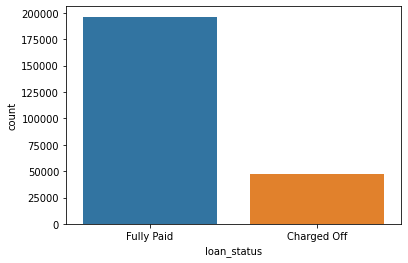

In [9]:
sns.countplot(x='loan_status',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 45000.0)

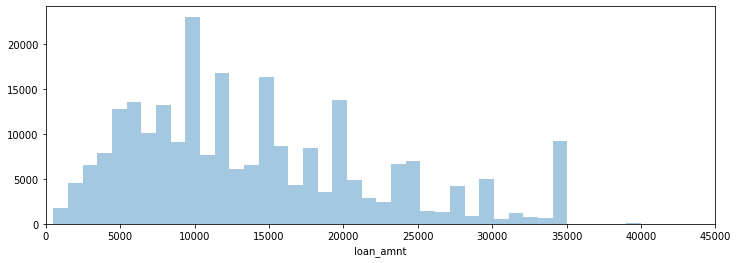

In [10]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],kde=False,bins=40)
plt.xlim(0,45000)

In [11]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168207,0.953991,0.350645,0.039400,0.199569,-0.076191,0.327038,0.098642,0.223709,0.222766,-0.108474
int_rate,0.168207,1.000000,0.161728,-0.058711,0.175336,0.010923,0.061097,-0.008287,0.295787,-0.036064,-0.082344,0.058067
installment,0.953991,0.161728,1.000000,0.343360,0.037045,0.189721,-0.065902,0.314904,0.122360,0.202220,0.194119,-0.100190
annual_inc,0.350645,-0.058711,0.343360,1.000000,-0.182544,0.141520,-0.011175,0.300485,0.024712,0.200808,0.245598,-0.051352
dti,0.039400,0.175336,0.037045,-0.182544,1.000000,0.302965,-0.037477,0.141159,0.195208,0.227092,-0.056587,-0.031749
open_acc,0.199569,0.010923,0.189721,0.141520,0.302965,1.000000,-0.016461,0.221907,-0.132674,0.680615,0.110277,-0.027920
pub_rec,-0.076191,0.061097,-0.065902,-0.011175,-0.037477,-0.016461,1.000000,-0.098499,-0.073483,0.018940,0.013099,0.684923
revol_bal,0.327038,-0.008287,0.314904,0.300485,0.141159,0.221907,-0.098499,1.000000,0.224796,0.191937,0.193392,-0.123893
revol_util,0.098642,0.295787,0.122360,0.024712,0.195208,-0.132674,-0.073483,0.224796,1.000000,-0.104397,0.007837,-0.086715
total_acc,0.223709,-0.036064,0.202220,0.200808,0.227092,0.680615,0.018940,0.191937,-0.104397,1.000000,0.380668,0.041498


(10.0, 0.0)

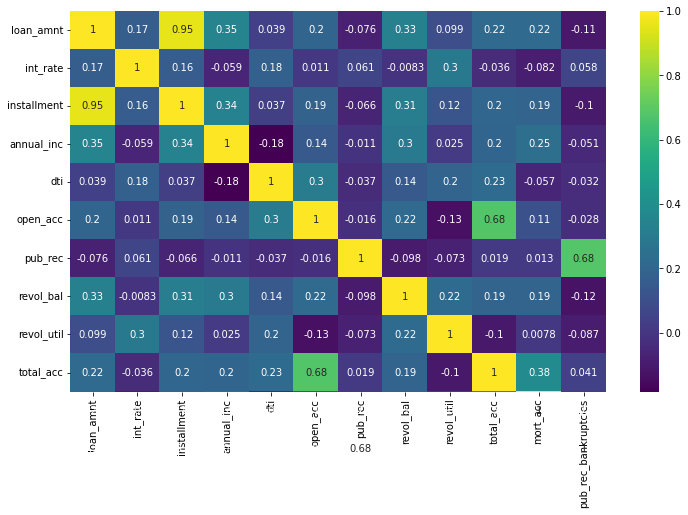

In [12]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.ylim(10, 0)

In [13]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [14]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


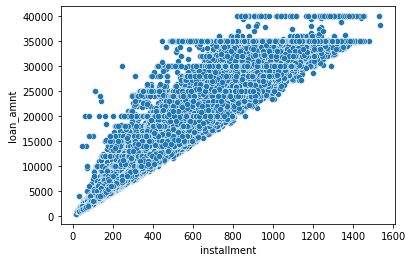

In [15]:
sns.scatterplot(x='installment',y='loan_amnt',data=df,)

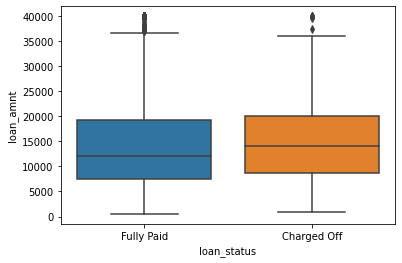

In [16]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [17]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,47762.0,15131.566413,8497.901903,1000.0,8650.0,14000.0,20000.0,40000.0
Fully Paid,196398.0,13853.832906,8302.964950,500.0,7500.0,12000.0,19200.0,40000.0


In [18]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [19]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

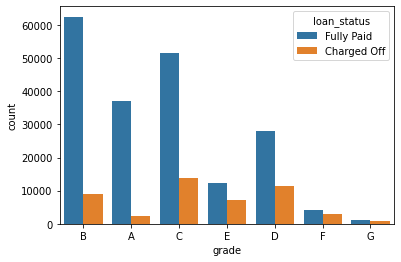

In [20]:
sns.countplot(x='grade',data=df,hue='loan_status')

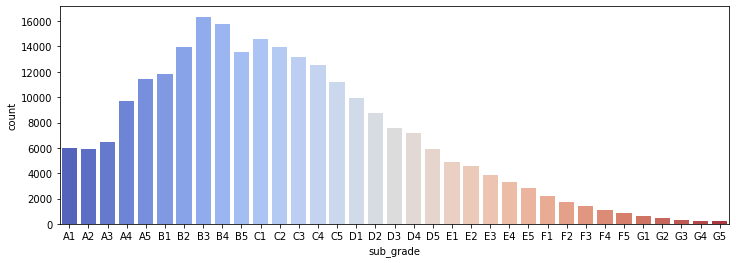

In [21]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' )

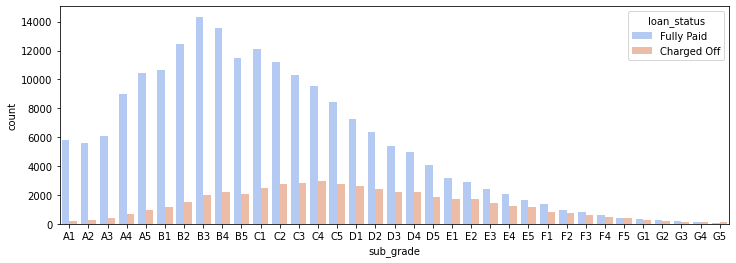

In [22]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' ,hue='loan_status')

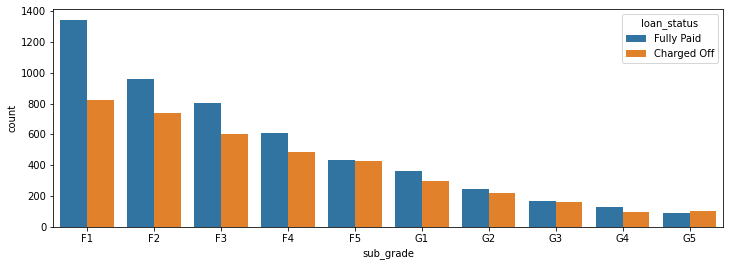

In [23]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='loan_status')

In [24]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', nan], dtype=object)

In [25]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [26]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1.0,Fully Paid
1,1.0,Fully Paid
2,1.0,Fully Paid
3,1.0,Fully Paid
4,0.0,Charged Off
...,...,...
244156,1.0,Fully Paid
244157,0.0,Charged Off
244158,1.0,Fully Paid
244159,0.0,Charged Off


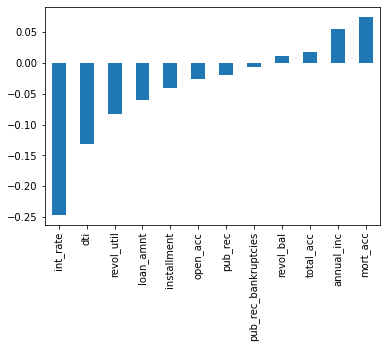

In [27]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

In [28]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1.0
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1.0
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1.0
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1.0
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0.0


In [29]:
len(df)

244161

In [30]:
#dapa preprocessing

In [31]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               14137
emp_length              11305
home_ownership              1
annual_inc                  1
verification_status         1
issue_d                     1
loan_status                 1
purpose                     1
title                    1075
dti                         1
earliest_cr_line            1
open_acc                    1
pub_rec                     1
revol_bal                   1
revol_util                182
total_acc                   1
initial_list_status         1
application_type            1
mort_acc                23367
pub_rec_bankruptcies      334
address                     1
loan_repaid                 1
dtype: int64

In [32]:
100* df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.790032
emp_length              4.630142
home_ownership          0.000410
annual_inc              0.000410
verification_status     0.000410
issue_d                 0.000410
loan_status             0.000410
purpose                 0.000410
title                   0.440283
dti                     0.000410
earliest_cr_line        0.000410
open_acc                0.000410
pub_rec                 0.000410
revol_bal               0.000410
revol_util              0.074541
total_acc               0.000410
initial_list_status     0.000410
application_type        0.000410
mort_acc                9.570324
pub_rec_bankruptcies    0.136795
address                 0.000410
loan_repaid             0.000410
dtype: float64

In [33]:
feat_info('emp_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [34]:
df['emp_title'].nunique()

114843

In [35]:
df['emp_title'].value_counts()

Manager                                    2683
Teacher                                    2680
Registered Nurse                           1160
Supervisor                                 1133
RN                                         1094
                                           ... 
Electronic Banking Specialist                 1
Physical Therapist Assist                     1
Vice President Org & Talent Development       1
Yorktelecom                                   1
Princi                                        1
Name: emp_title, Length: 114843, dtype: int64

In [36]:
df = df.drop('emp_title',axis=1)

In [37]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [38]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

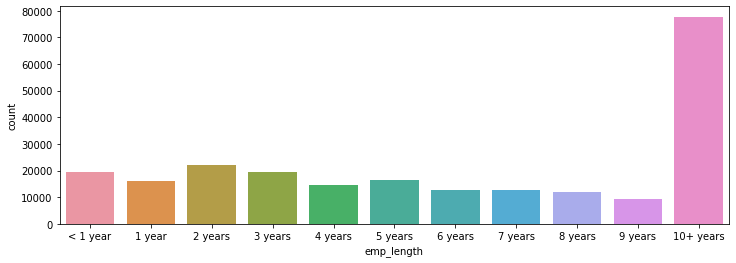

In [39]:
plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',data=df,order=emp_length_order)

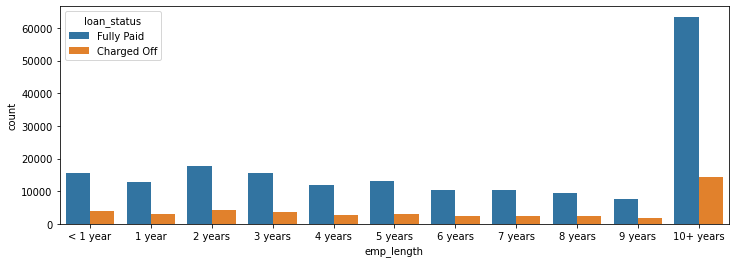

In [40]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')

In [41]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']

In [42]:
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

In [43]:
emp_len = emp_co/emp_fp

In [44]:
emp_len

emp_length
1 year       0.245330
10+ years    0.225284
2 years      0.242419
3 years      0.241654
4 years      0.235844
5 years      0.234498
6 years      0.229525
7 years      0.242137
8 years      0.252545
9 years      0.252698
< 1 year     0.254941
Name: loan_status, dtype: float64

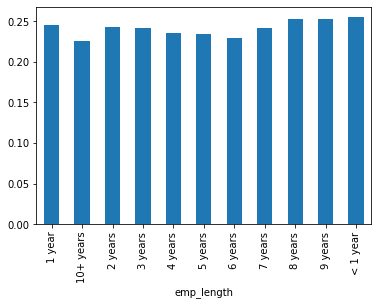

In [45]:
emp_len.plot(kind='bar')

In [46]:
df = df.drop('emp_length',axis=1)

In [47]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              1
annual_inc                  1
verification_status         1
issue_d                     1
loan_status                 1
purpose                     1
title                    1075
dti                         1
earliest_cr_line            1
open_acc                    1
pub_rec                     1
revol_bal                   1
revol_util                182
total_acc                   1
initial_list_status         1
application_type            1
mort_acc                23367
pub_rec_bankruptcies      334
address                     1
loan_repaid                 1
dtype: int64

In [48]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [49]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [50]:
df = df.drop('title',axis=1)

In [51]:
feat_info('mort_acc')

Number of mortgage accounts.


In [52]:
df['mort_acc'].value_counts()

0.0     86146
1.0     37181
2.0     30861
3.0     23462
4.0     17175
5.0     11189
6.0      6837
7.0      3725
8.0      1921
9.0      1034
10.0      540
11.0      287
12.0      161
13.0       89
14.0       60
15.0       36
16.0       22
17.0       14
19.0       11
18.0       11
20.0        9
24.0        5
22.0        4
25.0        3
21.0        3
31.0        2
30.0        1
23.0        1
34.0        1
28.0        1
32.0        1
26.0        1
Name: mort_acc, dtype: int64

In [53]:
print("Correlation with the mort_acc column")
df.corr()['mort_acc'].sort_values()

Correlation with the mort_acc column


int_rate               -0.082344
dti                    -0.056587
revol_util              0.007837
pub_rec                 0.013099
pub_rec_bankruptcies    0.028914
loan_repaid             0.074106
open_acc                0.110277
revol_bal               0.193392
installment             0.194119
loan_amnt               0.222766
annual_inc              0.245598
total_acc               0.380668
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [54]:
print("Mean of mort_acc column per total_acc")
df.groupby('total_acc').mean()['mort_acc']

Mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.057692
4.0      0.065385
5.0      0.090052
6.0      0.147656
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 116, dtype: float64

In [55]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [56]:
total_acc_avg[2.0]

0.0

In [57]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [60]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              1
annual_inc                  1
verification_status         1
issue_d                     1
loan_status                 1
purpose                     1
dti                         1
earliest_cr_line            1
open_acc                    1
pub_rec                     1
revol_bal                   1
revol_util                182
total_acc                   1
initial_list_status         1
application_type            1
mort_acc                23367
pub_rec_bankruptcies      334
address                     1
loan_repaid                 1
dtype: int64

In [61]:
df = df.dropna()

In [62]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [63]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [64]:
df['term'].value_counts()

 36 months    168568
 60 months     52080
Name: term, dtype: int64

In [65]:
# Or just use .map()
df['term'] = df['term'].apply(lambda term: int(term[:3]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [66]:
df = df.drop('grade',axis=1)

In [67]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [68]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [69]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [70]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [71]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [72]:
df['home_ownership'].value_counts()

MORTGAGE    111942
RENT         87270
OWN          21394
OTHER           21
NONE            18
ANY              3
Name: home_ownership, dtype: int64

In [73]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [74]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [75]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [76]:
df = df.drop('issue_d',axis=1)

In [77]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [78]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
df = df.drop('loan_status',axis=1)

In [81]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [82]:
# df = df.sample(frac=0.1,random_state=101)
print(len(df))

220648


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
scaler = MinMaxScaler()

In [86]:
X_train = scaler.fit_transform(X_train)

In [87]:
X_test = scaler.transform(X_test)

In [88]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [89]:
model = Sequential()

# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [90]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
690/690 [==============================] - 4s 4ms/step - loss: 0.3271 - val_loss: 0.2716
Epoch 2/25
690/690 [==============================] - 2s 3ms/step - loss: 0.2694 - val_loss: 0.2685
Epoch 3/25
690/690 [==============================] - 2s 3ms/step - loss: 0.2653 - val_loss: 0.2680
Epoch 4/25
690/690 [==============================] - 2s 3ms/step - loss: 0.2643 - val_loss: 0.2681
Epoch 5/25
690/690 [==============================] - 2s 3ms/step - loss: 0.2621 - val_loss: 0.2672
Epoch 6/25
690/690 [==============================] - 2s 3ms/step - loss: 0.2616 - val_loss: 0.2672
Epoch 7/25
690/690 [==============================] - 2s 3ms/step - loss: 0.2604 - val_loss: 0.2667
Epoch 8/25
690/690 [==============================] - 2s 3ms/step - loss: 0.2599 - val_loss: 0.2683
Epoch 9/25
690/690 [==============================] - 2s 3ms/step - loss: 0.2597 - val_loss: 0.2661
Epoch 10/25
690/690 [==============================] - 2s 4ms/step - loss: 0.2588 - val_loss: 0.2666

In [91]:
from tensorflow.keras.models import load_model

In [92]:
model.save('full_data_project_model.h5')  

In [93]:
losses = pd.DataFrame(model.history.history)

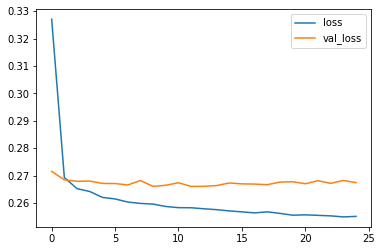

In [94]:
losses[['loss','val_loss']].plot()

In [95]:
from sklearn.metrics import classification_report,confusion_matrix

In [98]:
y_pred = model.predict(X_test)
predictions = np.round(y_pred).astype(int)
#predictions = model.predict_classes(X_test)

In [99]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.96      0.45      0.61      9010
         1.0       0.88      0.99      0.93     35120

    accuracy                           0.88     44130
   macro avg       0.92      0.72      0.77     44130
weighted avg       0.89      0.88      0.87     44130



In [100]:
confusion_matrix(y_test,predictions)

array([[ 4030,  4980],
       [  186, 34934]])

In [101]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt             9000.00
term                    36.00
int_rate                14.30
installment            308.92
annual_inc          115300.00
                      ...    
48052                    0.00
70466                    0.00
86630                    0.00
93700                    0.00
earliest_cr_year      2000.00
Name: 168515, Length: 78, dtype: float64

In [106]:
model.predict(new_customer.values.reshape(1,78))


array([[1.]], dtype=float32)

In [107]:
df.iloc[random_ind]['loan_repaid']

1.0